In [ ]:
# 필요한 라이브러리 설치
!pip install konlpy
!pip install matplotlib
!pip install seaborn
!pip install kiwipiepy
!pip install transformers sentencepiece
!pip install datasets
!pip install evaluate

  Obtaining dependency information for kiwipiepy from https://files.pythonhosted.org/packages/3e/42/7b090e50bc1b0bd0ac89bbedb280f6703e10a6319e5c5973d72805e575e4/kiwipiepy-0.20.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.7/34.7 MB 13.5 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 20.6 MB/s eta 0:00:0000:01:00:01
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.20.0-py3-none-any.whl size=34818023 sha256=7b6abcc067b4723c40c78f36d886f9860ca4dc61bf8e45b636ed710ab9489acf
  Stored in directory: /data/ephemeral/home/.cache/pip/wheels/b6/b1/66/2be9840f8ef3627d63d93503d81a5e3b41e9498dcb63b00b13
Successfully built kiwipiepy-model


In [6]:
!pip install -U transformers evaluate datasets

In [1]:
from kiwipiepy import Kiwi
from collections import Counter
import pandas as pd

# 데이터셋 로드 (예시 데이터 사용)
data = pd.read_csv('/data/ephemeral/data/filtered_texts_test.csv')  # 실제 파일 경로로 변경하세요.

# 형태소 분석기 초기화
kiwi = Kiwi()

# 모든 토큰을 저장할 리스트
all_tokens = []

# 각 텍스트에 대한 토큰화
for text in data['text']:
    tokens = [word.form for word in kiwi.tokenize(text)]
    all_tokens.extend(tokens)

# 토큰 빈도수 계산
token_counts = Counter(all_tokens)

# 상위 30개 빈도수 추출
most_common_tokens = token_counts.most_common(30)

# 데이터프레임으로 변환
token_freq_df = pd.DataFrame(most_common_tokens, columns=['토큰', '빈도수'])
print(token_freq_df)



     토큰  빈도수
0     …  783
1     ·  333
2     에  303
3     ᆫ  227
4     하  227
5     어  209
6     2  208
7    종합  173
8     로  134
9     는  121
10    1  118
11    의  118
12    이  112
13    은  102
14    美  100
15    3   99
16    4   99
17    만   94
18    서   92
19    5   87
20    도   86
21    일   80
22    원   80
23    년   75
24    %   75
25    대   72
26    다   68
27  대통령   67
28    8   62
29   으로   60


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: G

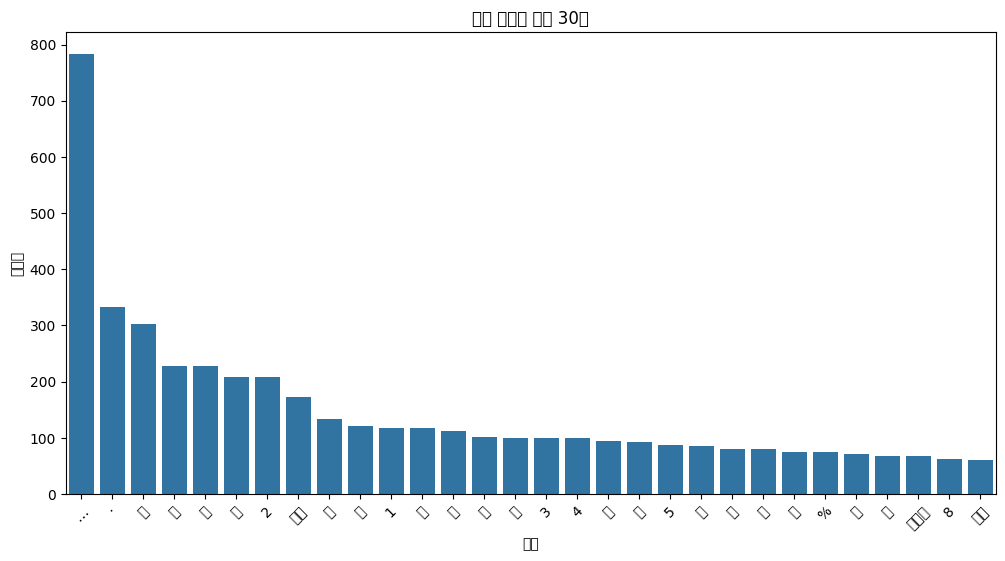

In [2]:
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
if platform.system() == 'Darwin':  # Mac
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # Windows
    font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family=font_name)
else:  # Linux (예: Ubuntu)
    rc('font', family='NanumGothic')

# 그래프 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='토큰', y='빈도수', data=token_freq_df)
plt.title('토큰 빈도수 상위 30개')
plt.xticks(rotation=45)
plt.show()


In [4]:
# 필요한 라이브러리
from transformers import BertTokenizer
import pandas as pd
from collections import Counter

# 데이터셋 로드
data = pd.read_csv('/data/ephemeral/data/filtered_texts_test.csv')  

# 토크나이저 로드
tokenizer = BertTokenizer.from_pretrained('klue/bert-base')

# 모든 텍스트를 토큰화하고 'unk' 토큰의 빈도수와 위치 파악
unk_counts = []
unk_tokens_in_texts = {}

for idx, text in enumerate(data['text']):
    tokens = tokenizer.tokenize(text)
    unk_count = tokens.count(tokenizer.unk_token)  # unk 토큰 개수 확인
    if unk_count > 0:
        unk_counts.append(unk_count)
        unk_tokens_in_texts[idx] = tokens  # 'unk' 토큰이 포함된 전체 토큰 리스트 저장

# unk 토큰 빈도 출력
total_unk_count = sum(unk_counts)
print(f"총 'UNK' 토큰 개수: {total_unk_count}")

# unk 토큰이 포함된 텍스트의 예시를 출력
print("UNK 토큰 포함 텍스트 예시 (최대 5개):")
for i, (idx, tokens) in enumerate(unk_tokens_in_texts.items()):
    if i >= 5:  # 최대 5개 예시만 출력
        break
    print(f"텍스트 인덱스: {idx}, UNK 토큰 개수: {tokens.count(tokenizer.unk_token)}")
    print(f"토큰 리스트: {tokens}")
    print("------------")


총 'UNK' 토큰 개수: 57
UNK 토큰 포함 텍스트 예시 (최대 5개):
텍스트 인덱스: 15, UNK 토큰 개수: 1
토큰 리스트: ['G', '##D', '이스라엘', '강팀', '감독', '##으로', '축구', '##연맹', 'W', '[UNK]', '참가']
------------
텍스트 인덱스: 79, UNK 토큰 개수: 1
토큰 리스트: ['2', '##개', '##월', '전보', '##다', '74', '%', '감소', '##해', '…', '전년', '##보도', '3', '.', '1', '%', '[UNK]']
------------
텍스트 인덱스: 104, UNK 토큰 개수: 1
토큰 리스트: ['KB', '##증권', '오리온', '중간', '성장', '##둔', '##점', '…', '[UNK]']
------------
텍스트 인덱스: 105, UNK 토큰 개수: 1
토큰 리스트: ['유', '##튜', '##버', '공공', '##기', '##관', '손', '##에', '독재', '…', '[UNK]', '집', '명', '##패', '##에', '넘', '##는', '##다']
------------
텍스트 인덱스: 130, UNK 토큰 개수: 1
토큰 리스트: ['[UNK]', '공사', '파키스탄', '내', '4', '##개', '공사', '중단', '…', '기타', '공사', '고조', '##종합']
------------


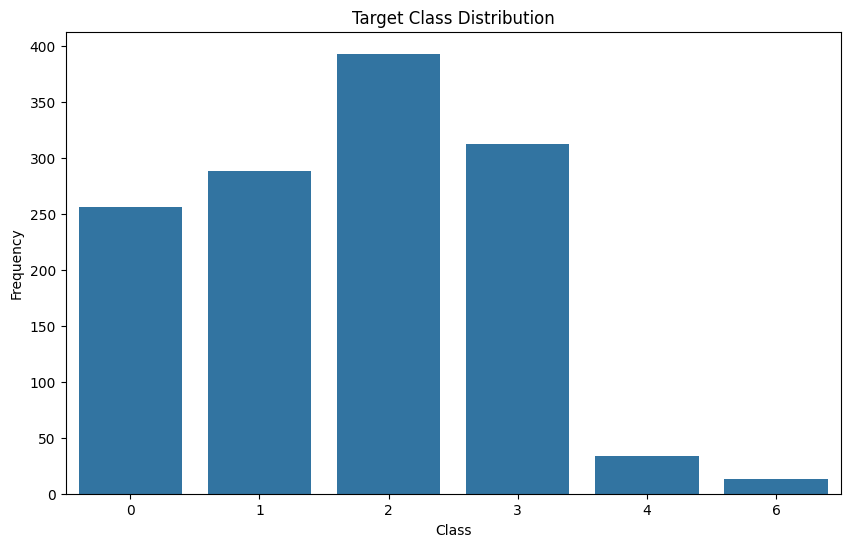

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터셋 로드
data = pd.read_csv('/data/ephemeral/data/new_labeled_dataset_ens.csv')

# target 클래스 분포 확인
target_counts = data['target'].value_counts()

# 클래스 분포 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title("Target Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [6]:
!pip install kobert_transformers 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Obtaining dependency information for kobert_transformers from https://files.pythonhosted.org/packages/77/af/2a85216d5a4faf2d29fa8325cfdda9f29f8b4d3ad56040162dfb8fca6992/kobert_transformers-0.6.0-py3-none-any.whl.metadata


In [6]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback, AutoTokenizer, AutoModelForSequenceClassification, ElectraTokenizer,ElectraForSequenceClassification
import torch
from sklearn.model_selection import train_test_split
from pathlib import Path
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from kobert_transformers  import get_tokenizer
import re
import os

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    accuracy = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average="weighted")
    precision = precision_score(labels, preds, average="weighted")
    recall = recall_score(labels, preds, average="weighted")
    return {"accuracy": accuracy, "f1": f1, "precision": precision, "recall": recall}


# 데이터셋 로드
data = pd.read_csv('/data/ephemeral/data/train_aug_test_cleaned.csv')

def clean_text(text):
    text = re.sub(r'[^가-힣a-zA-Z0-9\s]', '', text)  # 한글, 영어, 숫자, 공백 제외 모두 제거
    text = re.sub(r'\s+', ' ', text).strip()  # 연속된 공백을 하나의 공백으로 변환
    return text


# 텍스트 전처리 적용
data['text'] = data['text'].apply(clean_text)

# 분류할 클래스 수 설정
num_labels = len(data['target'].unique())  # 데이터에 맞게 클래스 수 확인

# 데이터 분리
train_texts, val_texts, train_labels, val_labels = train_test_split(
    data['text'], data['target'], test_size=0.2, random_state=42)

model_name = 'monologg/kobert'

# 토크나이저 및 모델 로드 (동일 모델 사용)
# tokenizer = ElectraTokenizer.from_pretrained(model_name)  # ELECTRA 토크나이저 불러오기
# model = ElectraForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)  
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)


# 텍스트 토큰화
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=128)

# 데이터셋 클래스 정의
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels.reset_index(drop=True)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(int(self.labels[idx]))
        return item
    def __len__(self):
        return len(self.labels)

# 데이터셋 생성
train_dataset = NewsDataset(train_encodings, train_labels)
val_dataset = NewsDataset(val_encodings, val_labels)

# 출력 및 체크포인트 저장 디렉토리 설정
output_dir = Path('./results')
output_dir.mkdir(parents=True, exist_ok=True)

# 트레이너 설정
training_args = TrainingArguments(
    output_dir=str(output_dir),         
    report_to=[],
    num_train_epochs=15,                  
    per_device_train_batch_size=32,     
    per_device_eval_batch_size=32,       
    warmup_steps=500,                    
    weight_decay=0.01,                   
    logging_dir='./logs',               
    logging_steps=10,
    evaluation_strategy='epoch',         
    save_strategy='epoch',               
    save_total_limit=2,
    learning_rate=1e-5,
    load_best_model_at_end=True,          # 최적의 모델 로드
    metric_for_best_model="f1",           # f1 기준으로 최적 모델 선택
    greater_is_better=True                # 높은 f1 값이 더 좋은 것으로 설정
)

early_stopping = EarlyStoppingCallback(
    early_stopping_patience=3,           # 성능 개선 없을 경우 대기할 에포크 수
    early_stopping_threshold=0.001       # 개선으로 간주될 최소 변화량 (optional)
)

# 트레이너 생성
trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping]            
)

# 모델 학습
trainer.train()


# 모델 수동 저장
best_model_dir = "./results"
os.makedirs(best_model_dir, exist_ok=True)  # 경로가 없으면 생성
best_model_path = f"{best_model_dir}/{model_name.split('/')[-1]}.bin"

trainer.save_model(output_dir)  # 기본 체크포인트 저장
torch.save(model.state_dict(), best_model_path)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at monologg/kobert and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1559: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.956800,1.951300,0.183422,0.099930,0.111424,0.183422
2,1.924700,1.917092,0.264550,0.198446,0.222793,0.264550
3,1.874200,1.828597,0.430335,0.382402,0.446557,0.430335
4,1.601700,1.538013,0.573192,0.546517,0.583095,0.573192
5,1.398100,1.314073,0.643739,0.631190,0.660799,0.643739
6,1.238300,1.175100,0.649030,0.639597,0.655692,0.649030
7,1.099300,1.086320,0.661376,0.655901,0.663369,0.661376
8,0.907000,1.047247,0.687831,0.683878,0.688705,0.687831
9,0.695200,1.008197,0.701940,0.700575,0.703437,0.701940
10,0.647500,1.008352,0.708995,0.709672,0.712398,0.708995


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
import pandas as pd
import torch
from transformers import Trainer, TrainingArguments, EarlyStoppingCallback
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from pathlib import Path
import os
import re

# 모델과 토크나이저 임포트
from transformers import AutoTokenizer, AutoModelForSequenceClassification, ElectraTokenizer,ElectraForSequenceClassification

# 데이터셋 로드 및 전처리 함수 정의
data = pd.read_csv('/data/ephemeral/data/train_aug_test_cleaned.csv')

def clean_text(text):
    text = re.sub(r'[^가-힣a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

data['text'] = data['text'].apply(clean_text)

# 분류할 클래스 수 설정
num_labels = len(data['target'].unique())

# 데이터 분할
train_texts, val_texts, train_labels, val_labels = train_test_split(
    data['text'], data['target'], test_size=0.2, random_state=42)

# 모델 이름 목록과 전용 토크나이저 설정
model_names = [
    'monologg/koelectra-base-v3-discriminator',
    'klue/bert-base',
    'beomi/kcbert-base',
    # 'klue/roberta-large'
]

# 데이터셋 클래스 정의
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels.reset_index(drop=True)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(int(self.labels[idx]))
        return item
    def __len__(self):
        return len(self.labels)

# 메트릭 계산 함수 정의
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    accuracy = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average="weighted")
    precision = precision_score(labels, preds, average="weighted")
    recall = recall_score(labels, preds, average="weighted")
    return {"accuracy": accuracy, "f1": f1, "precision": precision, "recall": recall}

# 결과 저장 경로
output_dir = Path('./results')
output_dir.mkdir(parents=True, exist_ok=True)

# 앙상블을 위한 예측 저장 리스트
ensemble_predictions = []

# 모델별 학습 루프
for model_name in model_names:
    print(f"Training model: {model_name}")

    # 모델과 전용 토크나이저 로드
    if model_name in "koelectra":
            tokenizer = ElectraTokenizer.from_pretrained(model_name)
            model = ElectraForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
    else:
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

    # 텍스트 토큰화
    train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
    val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=128)

    # 데이터셋 생성
    train_dataset = NewsDataset(train_encodings, train_labels)
    val_dataset = NewsDataset(val_encodings, val_labels)

    # 트레이너 설정
    training_args = TrainingArguments(
        output_dir=str(output_dir / model_name.split("/")[-1]),         
        report_to=[],
        num_train_epochs=18,
        per_device_train_batch_size=32,
        per_device_eval_batch_size=32,
        warmup_steps=500,
        weight_decay=0.01,
        logging_dir='./logs',
        logging_steps=10,
        evaluation_strategy='epoch',
        save_strategy='epoch',
        save_total_limit=2,
        learning_rate=1e-5,
        load_best_model_at_end=True,
        metric_for_best_model="f1",
        greater_is_better=True
    )

    early_stopping = EarlyStoppingCallback(
        early_stopping_patience=3,
        early_stopping_threshold=0.001
    )

    # 트레이너 생성
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=compute_metrics,
        callbacks=[early_stopping]
    )

    # 모델 학습
    trainer.train()

    # 검증 데이터에 대한 예측 저장 (앙상블용)
    predictions = trainer.predict(val_dataset)
    ensemble_predictions.append(predictions.predictions)

# 앙상블: 모델별 예측을 평균하여 최종 예측 생성
final_preds = sum(ensemble_predictions) / len(ensemble_predictions)
final_labels = final_preds.argmax(axis=1)

# 최종 앙상블 결과 평가
accuracy = accuracy_score(val_labels, final_labels)
f1 = f1_score(val_labels, final_labels, average="weighted")
precision = precision_score(val_labels, final_labels, average="weighted")
recall = recall_score(val_labels, final_labels, average="weighted")

print(f"Ensemble Results - Accuracy: {accuracy}, F1: {f1}, Precision: {precision}, Recall: {recall}")


Training model: monologg/koelectra-base-v3-discriminator


Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at monologg/koelectra-base-v3-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1559: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.948600,1.945452,0.121693,0.055796,0.036196,0.121693
2,1.942300,1.939598,0.146384,0.066048,0.213363,0.146384
3,1.916200,1.919605,0.234568,0.143824,0.213909,0.234568
4,1.880000,1.856974,0.336861,0.249660,0.270318,0.336861
5,1.790400,1.761946,0.356261,0.272626,0.265322,0.356261
6,1.695300,1.652690,0.388007,0.323661,0.471930,0.388007
7,1.521200,1.530994,0.479718,0.428153,0.563173,0.479718
8,1.387900,1.404246,0.562610,0.540337,0.652248,0.562610
9,1.235300,1.295104,0.613757,0.598369,0.645401,0.613757
10,1.130000,1.215699,0.643739,0.639643,0.660615,0.643739


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/m

Training model: klue/bert-base


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1559: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.988500,1.960421,0.167549,0.129625,0.194841,0.167549
2,1.836000,1.817506,0.365079,0.358354,0.369000,0.365079
3,1.676100,1.597551,0.507937,0.502440,0.533608,0.507937
4,1.384900,1.304970,0.615520,0.611874,0.614945,0.615520
5,1.184500,1.117156,0.656085,0.653934,0.653488,0.656085
6,1.047700,1.032107,0.671958,0.671251,0.676131,0.671958
7,0.913100,0.986643,0.675485,0.674585,0.675564,0.675485
8,0.725100,1.000519,0.694885,0.692581,0.703813,0.694885
9,0.514200,0.943482,0.700176,0.698246,0.699240,0.700176
10,0.415500,0.941100,0.719577,0.717842,0.729837,0.719577


Training model: beomi/kcbert-base


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at beomi/kcbert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1559: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.963700,1.949325,0.174603,0.091696,0.118613,0.174603
2,1.794900,1.747592,0.449735,0.413823,0.443968,0.449735
3,1.530000,1.431717,0.530864,0.508961,0.567223,0.530864
4,1.276300,1.212711,0.608466,0.603634,0.617989,0.608466
5,1.179700,1.129067,0.622575,0.619045,0.638670,0.622575
6,0.981700,1.061351,0.640212,0.641053,0.657380,0.640212
7,0.786100,1.017504,0.663139,0.661443,0.673312,0.663139
8,0.562700,0.952695,0.701940,0.701393,0.708287,0.701940
9,0.384800,0.951070,0.703704,0.703918,0.713044,0.703704
10,0.215600,0.926454,0.733686,0.733127,0.743596,0.733686


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Ensemble Results - Accuracy: 0.7918871252204586, F1: 0.7908781270387317, Precision: 0.7914640201263962, Recall: 0.7918871252204586


In [26]:
import torch
torch.cuda.empty_cache()

In [12]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import re
from tqdm import tqdm

# 새 데이터셋 로드
new_data = pd.read_csv('/data/ephemeral/jung/merged_train_kobert.csv')

# 텍스트 전처리 함수
def clean_text(text):
    text = re.sub(r'[^가-힣a-zA-Z0-9\s]', '', text)  # 한글, 영어, 숫자, 공백 제외 모두 제거
    text = re.sub(r'\s+', ' ', text).strip()  # 연속된 공백을 하나의 공백으로 변환
    return text

new_data['text'] = new_data['text'].apply(clean_text)

# 모델과 토크나이저 로드
model_path = './results'  # 학습된 모델이 저장된 경로
model_name = "monologg/kobert"
tokenizer = AutoTokenizer.from_pretrained(model_name,trust_remote_code=True)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=7)  # num_labels를 7로 설정

# 모델의 가중치 파일 로드
model.load_state_dict(torch.load(f"{model_path}/{model_name.split('/')[-1]}.bin"))  # 저장된 가중치 파일 경로 수정

# 모델 평가 모드로 설정
model.eval()
model.to('cuda' if torch.cuda.is_available() else 'cpu')

# 배치 단위 예측 함수
def batch_predict(texts, batch_size=32):
    predictions = []
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    for i in tqdm(range(0, len(texts), batch_size)):
        batch_texts = texts[i:i+batch_size]
        
        # 토큰화 및 텐서 변환
        inputs = tokenizer(
            batch_texts.tolist(),
            truncation=True,
            padding=True,
            max_length=128,
            return_tensors="pt"
        ).to(device)
        
        with torch.no_grad():
            outputs = model(**inputs)
            batch_predictions = outputs.logits.argmax(dim=1).cpu().numpy()
            predictions.extend(batch_predictions)
    
    return predictions

# 배치 단위로 예측 수행
new_data['target'] = batch_predict(new_data['text'])

# 결과 저장
new_data[['ID', 'text', 'target']].to_csv('/data/ephemeral/data/new_labeled_dataset_kobert_2.csv', index=False)

print("Inference completed and results saved.")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at monologg/kobert and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 130/130 [00:02<00:00, 50.47it/s]

Inference completed and results saved.


In [28]:
import pandas as pd
import torch
import re
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import numpy as np


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


def clean_text(text):
    text = re.sub(r'[^가-힣a-zA-Z0-9\s]', '', text)  
    text = re.sub(r'\s+', ' ', text).strip()         
    return text


new_data = pd.read_csv('/data/ephemeral/data/normal_texts_ID.csv')


new_data['text'] = new_data['text'].apply(clean_text)


model_names = [
    'monologg/koelectra-base-v3-discriminator',
    'klue/bert-base',
    'beomi/kcbert-base',
    # 'klue/roberta-large'
]

model_dir = './results'


ensemble_logits = []


batch_size = 32

for model_name in model_names:
    print(f"Loading model: {model_name}")
    
    # 모델과 전용 토크나이저 로드
    if model_name in "koelectra":
            tokenizer = ElectraTokenizer.from_pretrained(model_name)
            model_path = f"{model_dir}/{model_name.split('/')[-1]}"
            model = ElectraForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
    else:
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        model_path = f"{model_dir}/{model_name.split('/')[-1]}"
        model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
    
    model.to(device)
    model.eval()
    

    inputs = tokenizer(
        list(new_data['text']),
        truncation=True,
        padding=True,
        max_length=128,
        return_tensors="pt"
    )
    

    inputs = {key: val.to(device) for key, val in inputs.items()}
    

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits  
        

    logits = logits.cpu().numpy()
    

    ensemble_logits.append(logits)


final_logits = np.mean(ensemble_logits, axis=0)


probs = np.exp(final_logits) / np.exp(final_logits).sum(axis=1, keepdims=True)


final_predictions = final_logits.argmax(axis=1)


new_data['target'] = final_predictions


new_data[['ID', 'text', 'target']].to_csv('/data/ephemeral/data/new_labeled_dataset_ens.csv', index=False)

print("Inference completed and results saved.")


Loading model: monologg/koelectra-base-v3-discriminator


Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at monologg/koelectra-base-v3-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading model: klue/bert-base


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading model: beomi/kcbert-base


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at beomi/kcbert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Inference completed and results saved.


In [35]:
import pandas as pd
import torch
import re
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def clean_text(text):
    text = re.sub(r'[^가-힣a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

new_data = pd.read_csv('/data/ephemeral/data/normal_texts_ID.csv')
new_data['text'] = new_data['text'].apply(clean_text)

model_names = [
    'monologg/koelectra-base-v3-discriminator',
    'klue/bert-base',
    'beomi/kcbert-base',
    # 'klue/roberta-large'
]

# 각 모델의 가중치를 성능 점수에 따라 설정
model_weights = [0.4, 0.4, 0.2]  # 성능에 따라 설정한 가중치 예시
model_dir = './results'
ensemble_logits = []

for model_name, weight in zip(model_names, model_weights):
    print(f"Loading model: {model_name}")
    if model_name == 'monologg/koelectra-base-v3-discriminator':
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
    else:
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

    model.to(device)
    model.eval()

    inputs = tokenizer(
        list(new_data['text']),
        truncation=True,
        padding=True,
        max_length=128,
        return_tensors="pt"
    )

    inputs = {key: val.to(device) for key, val in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

    logits = logits.cpu().numpy()
    weighted_logits = logits * weight  # 가중치를 적용한 로짓
    ensemble_logits.append(weighted_logits)

# 가중 평균으로 최종 로짓 계산
final_logits = np.sum(ensemble_logits, axis=0)
probs = np.exp(final_logits) / np.exp(final_logits).sum(axis=1, keepdims=True)
final_predictions = final_logits.argmax(axis=1)

# 결과 저장
new_data['target'] = final_predictions
new_data[['ID', 'text', 'target']].to_csv('/data/ephemeral/data/new_labeled_dataset_ens.csv', index=False)

print("Inference completed and results saved.")


Loading model: monologg/koelectra-base-v3-discriminator


Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at monologg/koelectra-base-v3-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading model: klue/bert-base


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading model: beomi/kcbert-base


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at beomi/kcbert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Inference completed and results saved.


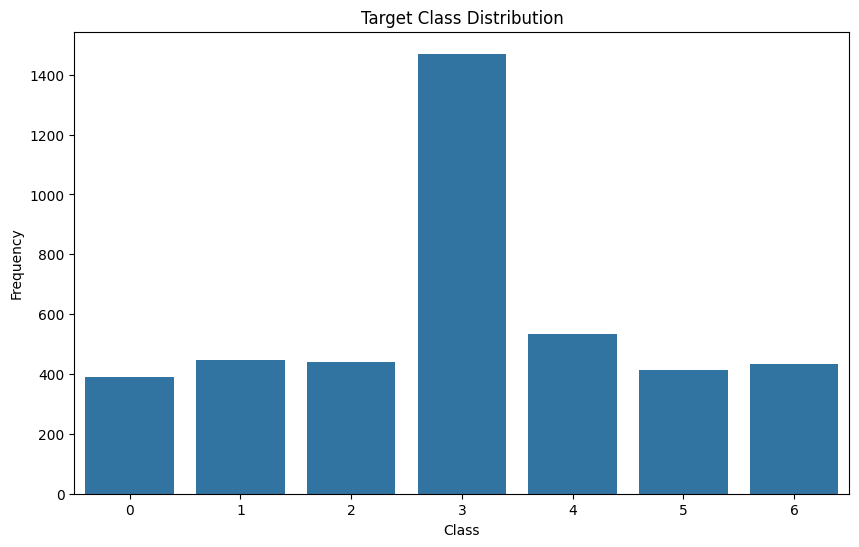

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터셋 로드
data = pd.read_csv('/data/ephemeral/jung/merged_train_2_cleanlab.csv')

# target 클래스 분포 확인
target_counts = data['target'].value_counts()

# 클래스 분포 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title("Target Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [11]:
import pandas as pd

# 두 개의 CSV 파일 불러오기
df1 = pd.read_csv('/data/ephemeral/data/train_aug_test_cleaned.csv')
df2 = pd.read_csv('/data/ephemeral/data/new_labeled_dataset_kobert.csv')

# 두 데이터프레임을 위아래로 합치기
merged_df = pd.concat([df1, df2], ignore_index=True)

# 결과를 새로운 CSV 파일로 저장
merged_df.to_csv('merged_train_kobert.csv', index=False)


### 한번 모델로 정제 및 리라벨링 된 데이터에 대하여 LLM 으로 Zeroshot Sequentail Prompting 적용하여 라벨링 재시도

In [ ]:
import pandas as pd
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
from tqdm import tqdm

# 소형 Llama 모델 및 토크나이저 로드
model_name = "Bllossom/llama-3.2-Korean-Bllossom-3B"  
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# 패딩 토큰 설정 (eos_token을 pad_token으로 사용)
tokenizer.pad_token = tokenizer.eos_token

# GPU 사용 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 데이터 로드
file_path = '/data/ephemeral/jung/merged_train_2.csv'
data = pd.read_csv(file_path)

# 배치 크기 설정
batch_size = 16

# Llama 모델을 사용한 라벨 예측 함수 (배치 처리)
def predict_labels_with_llama(texts):
    # Step 1: 노이즈 필터링
    filtered_texts = []
    for text in texts:
        filter_prompt = f"다음 텍스트에서 핵심 정보만 남기고 불필요한 정보를 제거하세요.\n\n텍스트: \"{text}\"\n정제된 텍스트:"
        inputs = tokenizer(filter_prompt, return_tensors="pt", padding=True, truncation=True).to(device)
        outputs = model.generate(inputs.input_ids, attention_mask=inputs.attention_mask, max_new_tokens=50)  # attention_mask 추가
        filtered_text = tokenizer.batch_decode(outputs, skip_special_tokens=True)
        filtered_text = [t.split("정제된 텍스트:")[-1].strip() for t in filtered_text]
        filtered_texts.extend(filtered_text)

    # Step 2: 범주 식별
    categories = []
    for filtered_text in filtered_texts:
        category_prompt = f"한국어 텍스트를 바탕으로, 이 텍스트가 0부터 6까지의 숫자 라벨 중 어느 범주에 속하는지 판단하세요.\n\n정제된 텍스트: \"{filtered_text}\"\n범주:"
        inputs = tokenizer(category_prompt, return_tensors="pt", padding=True, truncation=True).to(device)
        outputs = model.generate(inputs.input_ids, attention_mask=inputs.attention_mask, max_new_tokens=20)  # attention_mask 추가
        category = tokenizer.batch_decode(outputs, skip_special_tokens=True)
        category = [c.split("범주:")[-1].strip() for c in category]
        categories.extend(category)

    # Step 3: 최종 라벨 할당
    final_labels = []
    for filtered_text, category in zip(filtered_texts, categories):
        final_prompt = f"이 텍스트는 한국어 데이터셋의 라벨 분포에 따라 0, 1, 2, 3, 4, 5, 6 중 하나의 숫자 라벨을 할당받아야 합니다. 최종 라벨을 할당하세요.\n\n정제된 텍스트: \"{filtered_text}\"\n범주: {category}\n라벨:"
        inputs = tokenizer(final_prompt, return_tensors="pt", padding=True, truncation=True).to(device)
        outputs = model.generate(inputs.input_ids, attention_mask=inputs.attention_mask, max_new_tokens=20)  # attention_mask 추가
        final_label = tokenizer.batch_decode(outputs, skip_special_tokens=True)
        final_label = [f.split("라벨:")[-1].strip() for f in final_label]

        # 숫자 라벨로 변환
        final_labels.extend([int(label) if label.isdigit() else None for label in final_label])

    return final_labels

# tqdm을 사용하여 각 배치에 대해 라벨 예측
predicted_labels = []
for i in tqdm(range(0, len(data), batch_size), desc="Processing Batches"):
    batch_texts = data['text'][i:i+batch_size].tolist()
    predicted_labels.extend(predict_labels_with_llama(batch_texts))

# 예측된 라벨을 데이터프레임에 추가
data['predicted_target'] = predicted_labels

# 라벨이 바뀐 개수 확인
changed_labels_count = (data['target'] != data['predicted_target']).sum()
print(f"변경된 라벨 개수: {changed_labels_count}")

# 새 라벨로 업데이트한 후 CSV 파일로 저장
output_file_path = '/data/ephemeral/jung/merged_train_2_llama_cleaned.csv'
data.to_csv(output_file_path, index=False)
print(f"Llama를 통한 라벨링 개선된 데이터가 '{output_file_path}'에 저장되었습니다.")



Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Processing Batches:   0%|          | 0/259 [00:00<?, ?it/s]Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token